In [1]:
!python -m spacy download en_core_web_sm

2023-11-13 08:28:41.471546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 08:28:41.629508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-13 08:28:41.629552: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-13 08:28:41.652146: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 08:28:43.509680: W tensorflow/stream_executor/platform/de

In [2]:
!pip install xgboost==2.0.1


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install catboost==1.2.2


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#NLP libraries
import re
import spacy
import string
from sklearn.feature_extraction.text import TfidfVectorizer


#ML and models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix



/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-13 08:29:01.586228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 08:29:01.726783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-13 08:29:01.726820: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-13 

## Import of dataset and first investigation

In [6]:
df = pd.read_csv("youtoxic_english_1000.csv")
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.shape

(1000, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [9]:
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [10]:
df.nunique()

CommentId          1000
VideoId              13
Text                997
IsToxic               2
IsAbusive             2
IsThreat              2
IsProvocative         2
IsObscene             2
IsHatespeech          2
IsRacist              2
IsNationalist         2
IsSexist              2
IsHomophobic          1
IsReligiousHate       2
IsRadicalism          1
dtype: int64

In [11]:
col = list(df.columns)
for col_name in col:
  print(f'Name: {col_name}')
  print(df[col_name].value_counts())

Name: CommentId
Ugw7dxcDYYMAhf3roqx4AaABAg    1
Ugj9q6R3gxZpj3gCoAEC          1
UggyJcZ89cWxUngCoAEC          1
Ugxswrh35tG9Qi1NKZd4AaABAg    1
Ugxpgg01nbW9Rr2sXIl4AaABAg    1
                             ..
UggFX4zCcHRPtXgCoAEC          1
UgilC8NhlKosBXgCoAEC          1
Ugj7onbAIhP0jXgCoAEC          1
Ugi-Y6XWZdsDxHgCoAEC          1
UgzHID6RCvwkVgEGKYZ4AaABAg    1
Name: CommentId, Length: 1000, dtype: int64
Name: VideoId
9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
XRuCW80L9mA     10
dDbRyFIkNII     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64
Name: Text
run them over                                                                                                                                                                                                                                                                                   

In [12]:
duplicates = df[df.duplicated('Text', keep=False)]
duplicate_values = duplicates['Text'].tolist()
print(duplicate_values)


['RUN THEM OVER', 'run them over', 'run them over', 'run them over', 'RUN THEM OVER']


##  Calculating number of comments under each label

In [13]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = df.iloc[:,3:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(df))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(df)-clean_comments_count))

Total number of comments =  1000
Number of clean comments =  538
Number of comments with labels = 462


In [14]:
# Calculating number of comments in each category

counts = []
for col in col[3:]:
    counts.append((col, df[col].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,IsToxic,462
1,IsAbusive,353
2,IsThreat,21
3,IsProvocative,161
4,IsObscene,100
5,IsHatespeech,138
6,IsRacist,125
7,IsNationalist,8
8,IsSexist,1
9,IsHomophobic,0


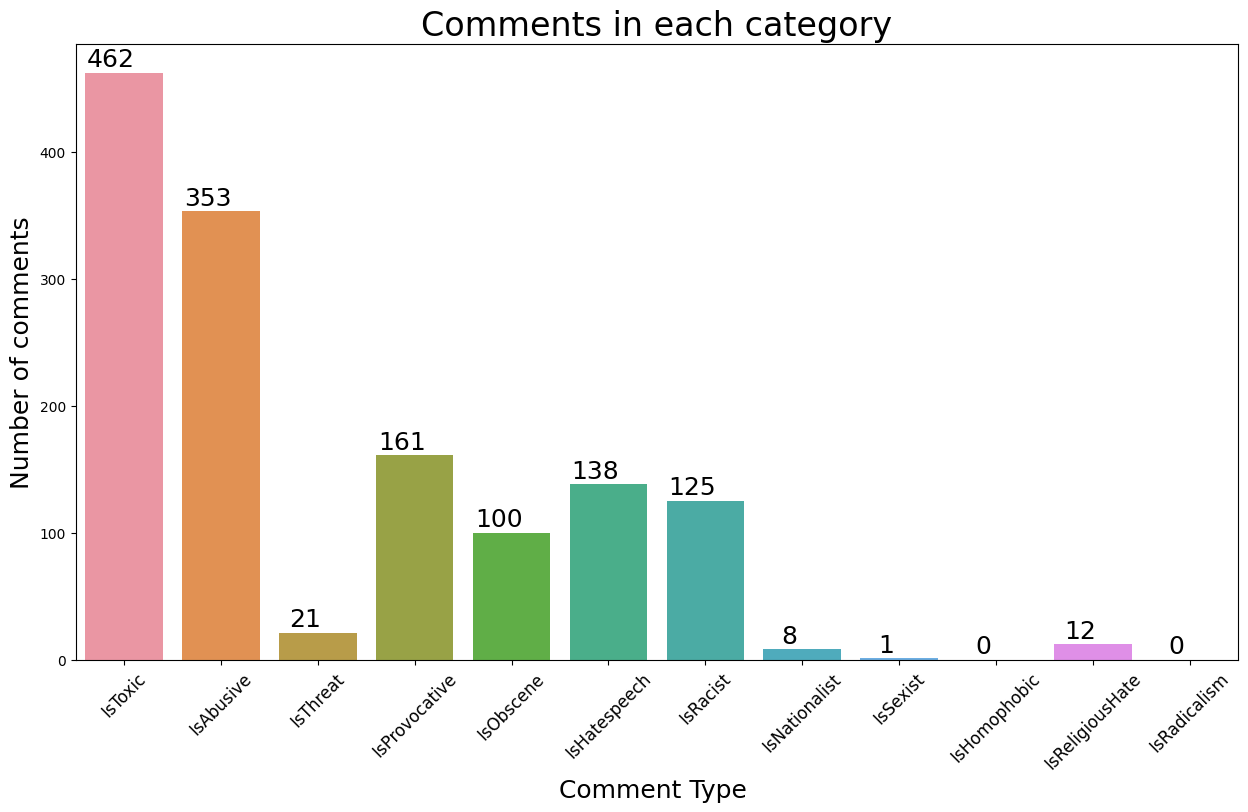

In [15]:
#sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=df.columns[3:], y=df.iloc[:, 3:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = df.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/3, height + 5, label, ha = 'center', fontsize=18)
plt.xticks(rotation=45, fontsize=12) 
plt.show()

### Calculating number of comments having multiple labels

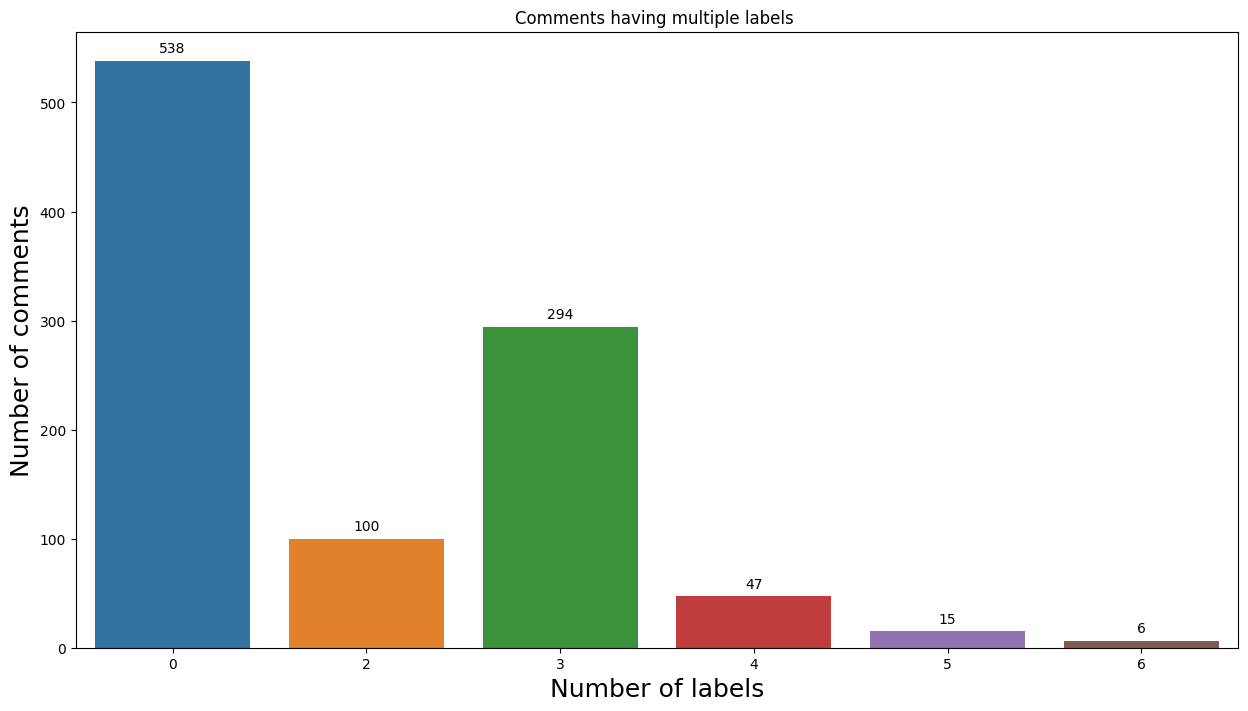

In [16]:
# Calculate the sum of labels for each row
rows = df.iloc[:,3:].sum(axis=1)

# Count the occurrences of different label sums
multiLabel_counts = rows.value_counts()
multiLabel_counts = multiLabel_counts.sort_index()

# Create the bar plot
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)
ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

## Conversion from object to int and creation new summarising column hate or not

In [17]:
bool_col = df.select_dtypes(include = ['bool'])
# Convert boolean columns to integers
df[bool_col.columns] = df[bool_col.columns].astype(int)
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_sumhate = df.copy()
df_sumhate.shape

(1000, 15)

In [19]:
df_sumhate['Hate'] = df_sumhate.select_dtypes( include= ['int']).any(axis=1).astype(int)
df_sumhate.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,Hate
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0,1
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0,1
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0,0


### Investigate targeted variable 

/tmp/ipykernel_2257/374701907.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


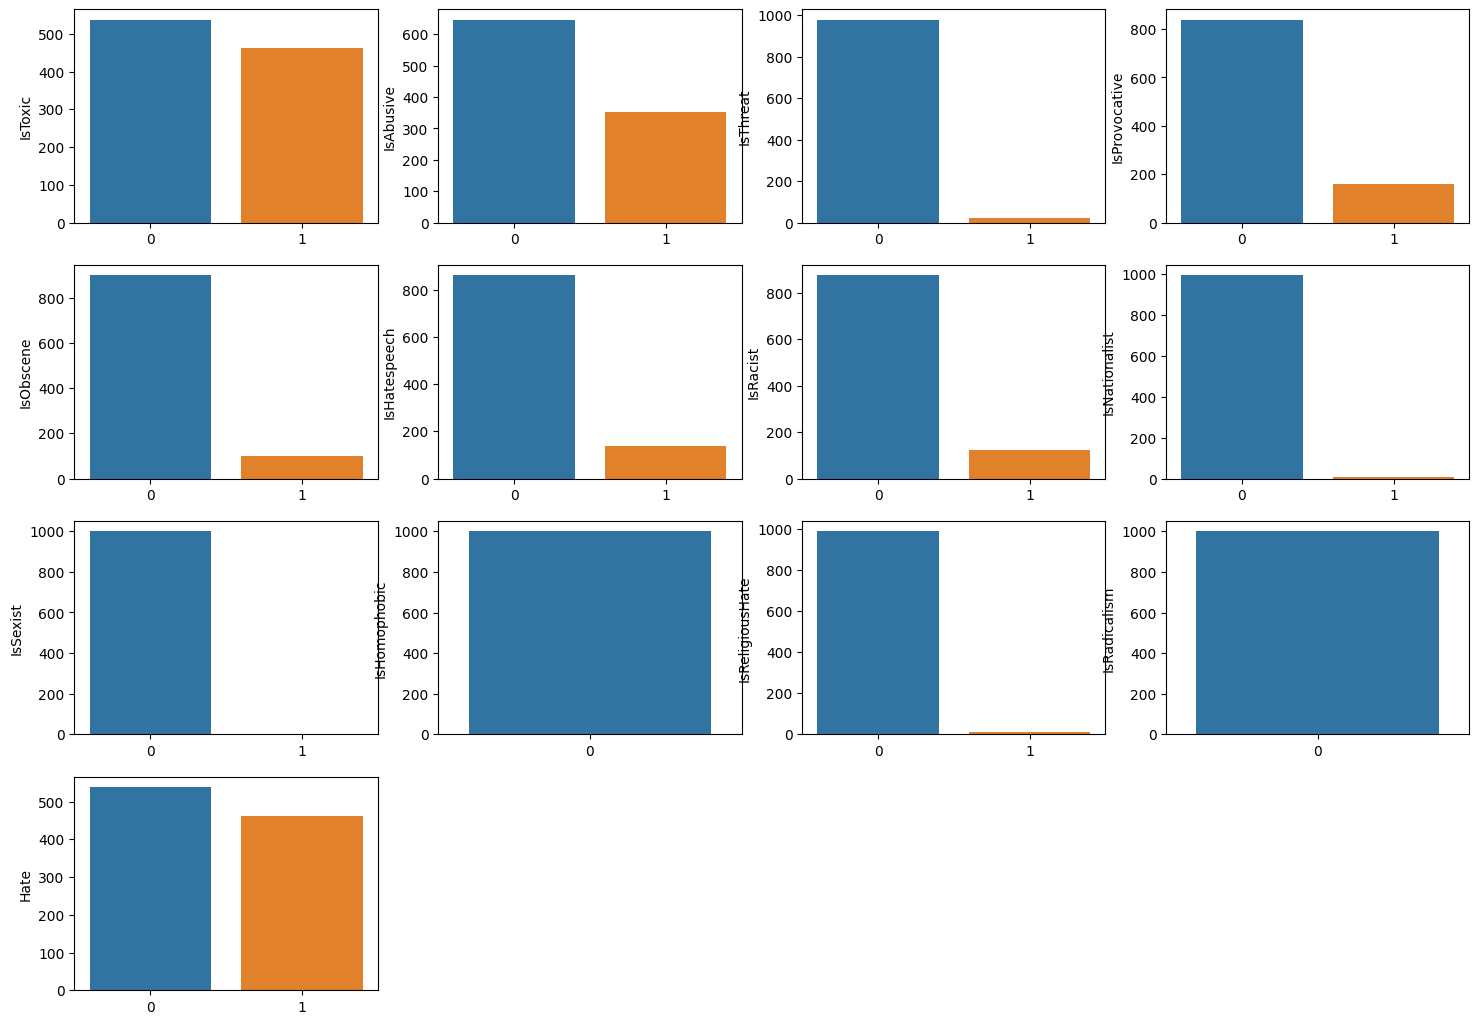

In [20]:
plt.figure(figsize=(18, 36))
plt.title("Features Distribution")
plt.xticks(rotation=90)
index = 1
col_hate = df_sumhate.select_dtypes(include= ['int'])

for col in col_hate:
    y = df_sumhate[col].value_counts()
    plt.subplot(11, 4, index)
    sns.barplot(x=list(y.index), y=y)
    index += 1


Looking at different "kind of hate" comments distribution some of them looks very unbalanced but if we look at resumen "hate" column it looks quite balanced

The highest proportion of hate expressions are at the variables Toxic and Abusive, so lets visualise it with Word cloud tool

### Word cloud

Word cloud is a text visualization tool that help’s us to get insights into the most frequent words present in the corpus of the data.

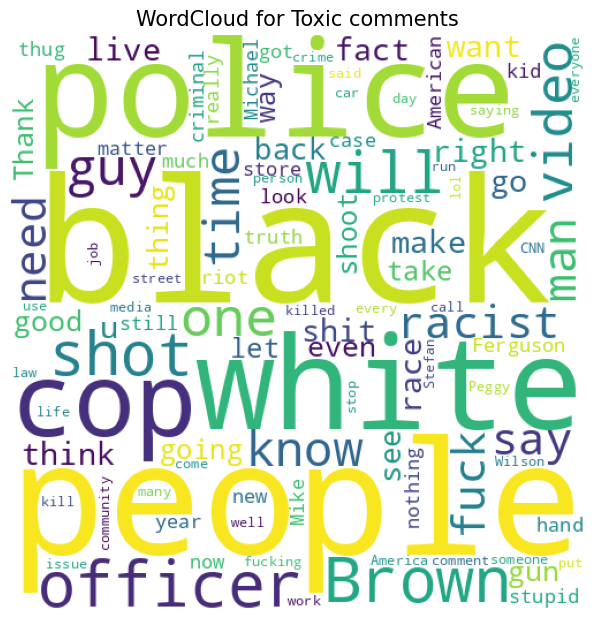

In [21]:
from wordcloud import WordCloud
def word_cloud(data):
# Joining all the tweets to get the corpus
    comments = " ".join(df_sumhate['Text'])

    plt.figure(figsize = (8,6))

    # Forming the word cloud
    wc = WordCloud(max_words = 100,width = 500,
	    			height = 500, background_color ='white',
		    		collocations = False).generate(comments)

    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for Toxic comments', fontsize = 15)
    plt.axis('off')
    plt.imshow(wc)
    plt.tight_layout(pad = 0)
    plt.show()

    print()

word_cloud(df_sumhate[df_sumhate['IsToxic']==1])



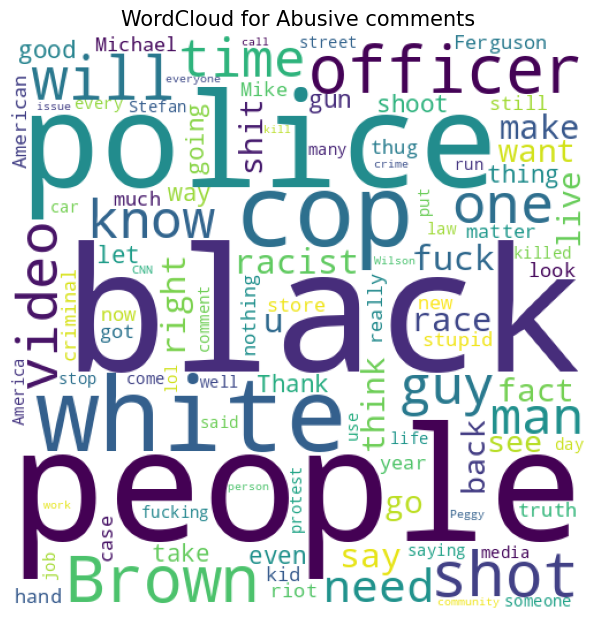

In [22]:
def word_cloud(data):
# Joining all the tweets to get the corpus
    comments = " ".join(df_sumhate['Text'])

    plt.figure(figsize = (8,6))

    # Forming the word cloud
    wc = WordCloud(max_words = 100,width = 500,
	    			height = 500, background_color ='white',
		    		collocations = False).generate(comments)

    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for Abusive comments', fontsize = 15)
    plt.axis('off')
    plt.imshow(wc)
    plt.tight_layout(pad = 0)
    plt.show()

    print()

word_cloud(df_sumhate[df_sumhate['IsAbusive']==1])

## Text cleaning with SpaCy and Regex

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:

nlp = spacy.load('en_core_web_sm')

In [25]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
print(list(stopwords)[0:10])


['a', 'name', 'go', 'its', 'everything', 'mine', 'could', '’m', 'your', 'even']


In [26]:
#check the entities in the text
for text in df_sumhate['Text'][:20]:
    processed = nlp(text)
    for ent in processed.ents:
        print(f"{ent.label_:{10}} - {ent.text.upper()}")

CARDINAL   - TWO
PERSON     - SMERCONISH
PERSON     - MASRI
PERCENT    - THE 99.999%
GPE        - AMERICA
CARDINAL   - TWO
PERSON     - WILSON
ORG        - FUCKIN DAFT MAN
PRODUCT    - CRIMINALS
NORP       - ARAB
CARDINAL   - 6
CARDINAL   - SIX
NORP       - MUSLIM
ORG        - FERGUSON
NORP       - AFRICAN AMERICAN'S
ORG        - LOVE
LOC        - STATEN ISLAND
ORG        - LOVE
PERSON     - MIKE BROWN
PERSON     - FERGUSON
PERSON     - ERIC GARNIER
LOC        - STATEN ISLAND
PERSON     - MIKE
ORG        - CNN
GPE        - MASRI
ORG        - ISIS
GPE        - AMERICA
PERSON     - BASSEM MASRI
PERSON     - BASSEM MASRI
GPE        - THUG
PERSON     - BROWN
PERSON     - MASRI
GPE        - USA
CARDINAL   - ONLY TWO
NORP       - TOTALITARIAN
GPE        - USA
ORG        - THE SECRET SERVICES
PERSON     - CHRISTOPHER HITCHENS


In [27]:
#checking the text for specific caracters (raw text )
text = ' '.join(df_sumhate['Text'])
print(text)

If only people would just take a step back and not make this case about them, because it wasn't about anyone except the two people in that situation.  To lump yourself into this mess and take matters into your own hands makes these kinds of protests selfish and without rational thought and investigation.  The guy in this video is heavily emotional and hyped up and wants to be heard, and when he gets heard he just presses more and more.  He was never out to have a reasonable discussion.  Kudos to the Smerconish for keeping level the whole time and letting Masri make himself out to be a fool.  How dare he and those that tore that city down in protest make this about themselves and to dishonor the entire incident with their own hate.  By the way, since when did police brutality become an epidemic?  I wish everyone would just stop pretending like they were there and they knew EXACTLY what was going on, because there's no measurable amount of people that honestly witnessed this incident, so

In [28]:
# find all urls
re.findall('https?://\S+|www\.\S+', text)
#re.findall(r'(?:\s|^)(https?://\S+|www\.\S+)', text)

['https://www.facebook.com/bassem.masri.520',
 'http://soundcloud.com/derek-savage-3/tha-bigger-picture',
 'http://ago.mo.gov/VehicleStops/2013/reports/161.pdf',
 'http://tftppull.freethoughtllc.netdna-cdn.com/wp-content/uploads/2014/11/murdered-by-police.jpg',
 'http://www.cnn.com/2014/09/10/us/ferguson-michael-brown-shooting-witnesses/',
 'http://www.wnd.com/2014/08/black-cop-kills-white-man-media-hide-race/',
 'http://www.',
 'http://www.sltrib.com/sltrib/news/58313255-78/taylor-police-officer-burbank.html.csp',
 'http://thefreethoughtproject.com/ferguson-cop-choked-hog-tied-12-year-old-accused-assault/',
 'http://kuvat.uusisuomi.fi/sites/default/files/imagecache/artikkelikuva_std/kuvat/vicdan0002.jpg\ufeff',
 'https://youtu.be/qLpGdYVx-DM',
 'http://www.liveleak.com/view?i=464_1408123040']

In [29]:
# find all specific symbols which are not in ASCII and no alphabetic
symb = re.findall('[^\x00-\x7Fa-zA-Z]', text)
print(symb)

['\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '–', '–', '\ufeff', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\ufeff', '👍', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', 'ø', '\xa0', '\xa0', '\xa0', '\xa0', '“', '’', '”', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\ufeff', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '\xa0', '’', '

In [30]:
#function to clean the text 
def clean_text(text):
    #patterns = ['orrrr', 'hmmmm', 'ahhhhhhhi','haaaa', 'dowww', 'xdddddddddddddddd', 'ooo', 'soooooooooo', 'ummm', 'aaannnyythe', 'heeeeerrrr', 'hmmm', 'kkk']
    # words to delete
    #text = re.sub('https?://\S+|www\.\S+', '', text) # eliminate URL
    #text = re.sub('<.*?>+', '', text) # eliminate URL tags
    #text = re.sub('[^\x00-\x7Fa-zA-Z]','', text) #specific symbols which are not in ASCII and no alphabetic
    text = "".join([word.lower() for word in text if word not in string.punctuation]) # eliminate punctuation
    #text = re.sub(r'\w*\d\w*|\d', '', text) # eliminate numbers and words with numbers
    tokens = nlp(text) # tokenization with spacy
    text = " ".join([word.lemma_ for word in tokens if word.lemma_ not in stopwords]).lower() #checking stopwords plus lematization
    #text = re.compile(r'\b(?:' + '|'.join(map(re.escape, patterns)) + r')\b', flags=re.IGNORECASE).sub('', text)
    text = ' '.join(text.split()) # eliminate extra space
    return text
    
df_sumhate['processed_text'] = df_sumhate['Text'].apply(lambda x: clean_text(x))
df_sumhate.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,Hate,processed_text
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0,0,people step case people situation lump mess ma...
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0,1,law enforcement train shoot apprehend train sh...
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0,1,reckon black life matter banner hold white cun...
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0,0,large number people like police officer crimin...
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0,0,arab dude absolutely right shoot 6 extra time ...


In [31]:
#check the changes of the symbol length in 1st cell
print(len(df_sumhate['Text'][0]))
print(len(df_sumhate['processed_text'][0]))

1558
653


In [32]:
df_final= df_sumhate[['processed_text', 'Hate']]
df_final.head()

,processed_text,Hate
0,people step case people situation lump mess ma...,0
1,law enforcement train shoot apprehend train sh...,1
2,reckon black life matter banner hold white cun...,1
3,large number people like police officer crimin...,0
4,arab dude absolutely right shoot 6 extra time ...,0


In [33]:
#briefly checking the clean text
text1 = ' '.join(df_final['processed_text'])
print(text1)

people step case people situation lump mess matter hand kind protest selfish rational thought investigation guy video heavily emotional hype want hear gets hear press reasonable discussion kudo smerconish level time let masri fool dare tear city protest dishonor entire incident hate way police brutality epidemic i wish stop pretend like know exactly s measurable people honestly witness incident clue way issue swing grand jury informed trust majority rule right course action let thank 99999 police officer america actually serve protect bit jerk pull i i respect job know people pout hold accountable action people hate police need officer emergency law enforcement train shoot apprehend train shoot kill i thank wilson kill punk bitch reckon black life matter banner hold white cunt kinda patronizing ironically racist come somethin white folk self pride ooo look i i m nice black people race actually world pussyfootin fear racist fuckin daft man large number people like police officer crimina

In [34]:
# find all urls after cleaning
re.findall('https?://\S+|www\.\S+', text1)

[]

In [35]:
#checking for the non alphabetic, uppercase and other no desired symbols 
invalid_entries = df_final[df_final['processed_text'].str.contains(r'[^a-z\s]', regex=True)]
invalid_characters = invalid_entries['processed_text'].apply(lambda x: re.findall(r'[^a-z\s]', x))
print(invalid_characters)

0                              [9, 9, 9, 9, 9]
4                                          [6]
5                                    [5, 2, 0]
18                                   [–, –, ﻿]
22                                         [1]
                        ...                   
977                               [1, 1, 2, 1]
984                         [0, 0, 5, 0, 1, 8]
985                               [2, 0, 1, 6]
986                            [9, 4, 1, 😂, 😭]
990    [4, 6, 4, 1, 4, 0, 8, 1, 2, 3, 0, 4, 0]
Name: processed_text, Length: 164, dtype: object


In [36]:
# checking for the starnge words
words = re.findall(r'\b\w*?(\w)\1{2,}\w*\b',text1)
word_set = set()  # Создаем множество, чтобы избежать дубликатов

for match in words:
    match_word = re.findall(r'\b\w*'+match+r'{3,}\w*\b', text1)  # Ищем слова, содержащие данную последовательность
    word_set.update(match_word)  # Добавляем их в множество

result = list(word_set)  # Преобразуем множество обратно в список

print(result)

['10000', 'alllivesmatter', 'bulllsship', 'dowww', 'ahhhhhhhi', 'hmmm', 'xdddddddddddddddd', 'looooooooooooooooooooooove', 'httpwwwwndcom201408blackcopkillswhitemanmediahiderace', 'httpwwwsltribcomsltribnews5831325578taylorpoliceofficerburbankhtmlcsp', 'orrrr', 'heeeeerrrr', 'httpwww', 'httpkuvatuusisuomifisitesdefaultfilesimagecacheartikkelikuvastdkuvatvicdan0002jpg', 'boooshit', 'emplpyeee', '222', 'assss', 'xxx', '99999', 'soooooooooo', 'httpswwwfacebookcombassemmasri520', 'kkk', 'aaannnyythe', 'jewnesss', '11000', 'woweee', 'httpwwwcnncom20140910usfergusonmichaelbrownshootingwitnesse', 'haaaa', 'ooo', 'duhhh', '30000', '100000', 'httpwwwliveleakcomviewi4641408123040', 'ummm', 'hmmmm']


## Vectorisation with N-gram ("bag of words")

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(df_final['processed_text'])
print(X_counts.shape)

(1000, 12078)


In [38]:
print(ngram_vect.get_feature_names_out())

['005 018' '010 legend' '018 idea' ... 'zionist jew' 'zionist sympathiser'
 'zone thing']


In [39]:
X_feat = pd.DataFrame(X_counts.toarray())
X_feat.columns = ngram_vect.get_feature_names_out()
y = df_final['Hate']
X_feat.head()

,005 018,010 legend,018 idea,034 hard,05 gun,0810 dat,10 black,10 hypocrite,10 minute,100 agree,...,zimmerman easily,zimmerman injury,zimmerman jerk,zimmerman looting,zimmerman michael,zimmerman zimmerman,zimmermans withhold,zionist jew,zionist sympathiser,zone thing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vectorisation with TF-IDF 

In [40]:
tfv = TfidfVectorizer( )

X_tfv =  tfv.fit_transform(df_final['processed_text'])
X_tfv.shape

(1000, 3612)

In [41]:
print(tfv.get_feature_names_out())

['005' '010' '018' ... 'zimmermans' 'zionist' 'zone']


In [42]:
X_features = pd.DataFrame(X_tfv.toarray())
X_features.columns = tfv.get_feature_names_out()
y = df_final['Hate']
X_features.head()


,005,010,018,034,05,0810,10,100,10000,100000,...,youse,youth,youtube,ypu,yr,yup,zimmerman,zimmermans,zionist,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cross Validation first look

In [43]:
#after vectorization with "bag of words"
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_feat, y, cv=k_fold, scoring='accuracy', n_jobs=-1)
    

array([0.45 , 0.63 , 0.635, 0.48 , 0.595])

In [44]:
#after vectorization with TF-IDF
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, y, cv=k_fold, scoring='accuracy', n_jobs=-1)
    

array([0.655, 0.655, 0.765, 0.695, 0.68 ])

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d8103776-8bc3-42d5-af3b-9ad38442056c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>